## Workflow - Pass Completion Rate (Player)

---
> ### 1. SET UP DEVELOPMENT ENVIRONMENT

**1.0 Import required Python software into current development environment (i.e. this notebook)**
```
import pandas as pd
```

In [27]:
import pandas as pd

**1.1 Configure notebook for code autocompletion + displaying plots + displaying max columns and rows of panda data objects**
```
%config Completer.use_jedi = False
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None
```

In [28]:
%config Completer.use_jedi = False
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None

---
> ### 2. LOAD & PREP DATA

**2.0 Data Load** - read in the `match_events.csv` file located in the `data` directory (folder)
```
raw_data = pd.read_csv("data/match_events.csv")
```

In [29]:
raw_data = pd.read_csv("data/match_events.csv")

**2.1 Data Prep** - make a copy of raw data to work on called `df`

```
df = raw_data.copy()
```

In [30]:
df = raw_data.copy()

**2.2 Data Prep** - use the `head()` function to check the first 5 rows of the `df` object, which is a `pandas` dataframe (df), basically a 2 dimensional data structure with rows & columns 
```
df.head()
```

In [31]:
df.head()

,start_min,start_sec,end_min,end_sec,match_half,player1,player1_team,player2,player2_team,event,press,press_team,start_x,start_y,end_x,end_y,press_x,press_y
0,0,0,0.0,0.0,1,fernandes,man_u,NaN,NaN,set_piece,NaN,NaN,52.5,34.0,NaN,NaN,NaN,NaN
1,0,0,0.0,1.0,1,fernandes,man_u,ronaldo,man_u,completed_pass,NaN,NaN,52.5,34.0,55.8,31.3,NaN,NaN
2,0,1,0.0,2.0,1,ronaldo,man_u,matic,man_u,completed_pass,odegaard,arsenal,55.8,31.3,65.6,33.4,55.7,30.4
3,0,2,0.0,3.0,1,matic,man_u,dalot,man_u,completed_pass,nketiah,arsenal,65.6,33.4,72.2,55.2,63.4,36.4
4,0,3,0.0,5.0,1,dalot,man_u,NaN,NaN,incomplete_pass,NaN,NaN,72.2,55.2,NaN,NaN,NaN,NaN


**2.3 Data Prep** - check the dimensions of the `df` (<no. of rows>, <no. of columns>). Should be (1854, 18).
```
df.shape
```

In [32]:
df.shape

(1854, 18)

---
> ### 3. EXPLORATORY DATA ANALYSIS (EDA)

**3.0 EDA** - select just the `player1` column from `df` and chain the `value_counts()` function onto this to generate a frequency table 
```
df["player1"].value_counts()
```

In [33]:
df["player1"].value_counts()

elneny        126
cedric        116
telles        108
white         108
xhaka         108
odegaard      100
gabriel        97
varane         93
dalot          90
lindelof       89
ramsdale       84
tavares        81
mctominay      76
fernandes      73
saka           73
sancho         71
matic          61
ronaldo        56
nketiah        54
smith_rowe     41
de_gea         39
elanga         37
mata           20
rashford       14
lingard        12
martinelli     11
holding         8
tomiyasu        8
Name: player1, dtype: int64

**3.1 EDA** - copy the code from `3.0` and edit to also select the `event` column as well
```
df[["player1", "event"]].value_counts()
```

In [34]:
df[["player1", "event"]].value_counts()

player1     event                        
elneny      completed_pass                   64
xhaka       completed_pass                   63
cedric      completed_pass                   55
white       completed_pass                   55
odegaard    completed_pass                   49
lindelof    completed_pass                   48
dalot       completed_pass                   43
telles      completed_pass                   42
varane      completed_pass                   41
gabriel     completed_pass                   40
matic       completed_pass                   29
saka        completed_pass                   26
lindelof    dribble                          26
fernandes   completed_pass                   26
ramsdale    completed_pass                   25
odegaard    dribble                          24
elneny      dribble                          24
tavares     completed_pass                   24
mctominay   completed_pass                   23
sancho      completed_pass                   2

**3.2 EDA** - create a new variable (object) called `pass_filter` that can be used to filter the `df` for either `"completed_pass"` and `"incomplete_pass"` events
```
pass_filter = (df["event"] == "completed_pass") | (df["event"] == "incomplete_pass")
```

In [35]:
pass_filter = (df["event"] == "completed_pass") | (df["event"] == "incomplete_pass")

**3.3 EDA** - use the `pass_filter` to view the `df` filtered for `"completed_pass"` and `"incomplete_pass"` events, also chaining on the `head()` function 
```
df[pass_filter].head()
```

In [36]:
df[pass_filter].head()

,start_min,start_sec,end_min,end_sec,match_half,player1,player1_team,player2,player2_team,event,press,press_team,start_x,start_y,end_x,end_y,press_x,press_y
1,0,0,0.0,1.0,1,fernandes,man_u,ronaldo,man_u,completed_pass,NaN,NaN,52.5,34.0,55.8,31.3,NaN,NaN
2,0,1,0.0,2.0,1,ronaldo,man_u,matic,man_u,completed_pass,odegaard,arsenal,55.8,31.3,65.6,33.4,55.7,30.4
3,0,2,0.0,3.0,1,matic,man_u,dalot,man_u,completed_pass,nketiah,arsenal,65.6,33.4,72.2,55.2,63.4,36.4
4,0,3,0.0,5.0,1,dalot,man_u,NaN,NaN,incomplete_pass,NaN,NaN,72.2,55.2,NaN,NaN,NaN,NaN
8,0,8,0.0,10.0,1,elneny,arsenal,cedric,arsenal,completed_pass,fernandes,man_u,37.6,40.0,28.8,18.3,37.4,42.6


**3.4 EDA** - copy the code in `3.3` and chain a `groupby()` function to this which specifies `player1` and `event` as the columns for grouping the data, also chaining a `size()` function after 
```
df[pass_filter].groupby(["player1", "event"]).size()
```

In [37]:
df[pass_filter].groupby(["player1", "event"]).size()

player1     event          
cedric      completed_pass     55
            incomplete_pass    10
dalot       completed_pass     43
            incomplete_pass     6
de_gea      completed_pass     17
            incomplete_pass     1
elanga      completed_pass     12
elneny      completed_pass     64
            incomplete_pass     3
fernandes   completed_pass     26
            incomplete_pass     6
gabriel     completed_pass     40
            incomplete_pass     6
holding     completed_pass      2
lindelof    completed_pass     48
            incomplete_pass     3
lingard     completed_pass      5
            incomplete_pass     1
martinelli  completed_pass      6
mata        completed_pass     10
            incomplete_pass     1
matic       completed_pass     29
            incomplete_pass     3
mctominay   completed_pass     23
            incomplete_pass     7
nketiah     completed_pass     19
            incomplete_pass     2
odegaard    completed_pass     49
            incomple

**3.5 EDA** - copy the code from `3.4` and further chain an `unstack()` function to this
```
df[pass_filter].groupby( ["player1", "event"]).size().unstack()
```

In [38]:
df[pass_filter].groupby( ["player1", "event"]).size().unstack()

event,completed_pass,incomplete_pass
player1,,
cedric,55.0,10.0
dalot,43.0,6.0
de_gea,17.0,1.0
elanga,12.0,NaN
elneny,64.0,3.0
fernandes,26.0,6.0
gabriel,40.0,6.0
holding,2.0,NaN
lindelof,48.0,3.0


**3.6 EDA** - copy the code from `3.5` and further chain a `sort_values()` function to this, specifying the `completed_pass` as the column to use for sorting, and to sort in descending order, i.e. `ascending = False`
```
df[pass_filter].groupby(["player1", "event"]).size().unstack().sort_values("completed_pass", ascending=False)
```

In [39]:
df[pass_filter].groupby(["player1", "event"]).size().unstack().sort_values("completed_pass", ascending=False)

event,completed_pass,incomplete_pass
player1,,
elneny,64.0,3.0
xhaka,63.0,4.0
white,55.0,6.0
cedric,55.0,10.0
odegaard,49.0,4.0
lindelof,48.0,3.0
dalot,43.0,6.0
telles,42.0,14.0
varane,41.0,5.0


**3.7 EDA** - copy the code from `3.6` and further chain a `sort_values()` function to this, specifying the `completed_pass` as the column to use for sorting, and to sort in descending order, i.e. `ascending = False`
```
df[pass_filter].groupby(["player1", "event"]).size().unstack().sort_values("completed_pass", ascending=False)
```

In [40]:
df[pass_filter].groupby(["player1", "event"]).size().unstack().sort_values("completed_pass", ascending=False)

event,completed_pass,incomplete_pass
player1,,
elneny,64.0,3.0
xhaka,63.0,4.0
white,55.0,6.0
cedric,55.0,10.0
odegaard,49.0,4.0
lindelof,48.0,3.0
dalot,43.0,6.0
telles,42.0,14.0
varane,41.0,5.0


---
> ### 4. DATA ANALYSIS & VISUALISATION

**4.0 ANALYSIS/VIZ** - copy the code from `3.7` and chain a `plot()` function onto this, specifying kind as a `"bar"`, and for the bar to be stacked
```
df[pass_filter].groupby(["player1", "event"]).size().unstack().sort_values("completed_pass", ascending=False).plot(kind="bar", stacked=True)
```

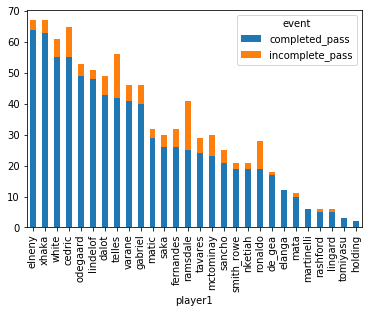

In [41]:
df[pass_filter].groupby(["player1", "event"]).size().unstack().sort_values("completed_pass", ascending=False).plot(kind="bar", stacked=True)

**4.1 ANALYSIS** - copy the code from `4.0` but cut the `sort_values()` and `plot()` functions. After the `unstack()` function chain an `assign()` function specified to create a new column called `rate` which that calculates each player's completed pass rate
```
df[ pass_filter ].groupby( ["player1", "event"]).size().unstack().assign(rate = lambda x: x["completed_pass"] / (x["completed_pass"] + x["incomplete_pass"]) * 100).sort_values("rate", ascending=False)
```

In [42]:
df[ pass_filter ].groupby( ["player1", "event"]).size().unstack().assign(rate = lambda x: x["completed_pass"] / (x["completed_pass"] + x["incomplete_pass"]) * 100).sort_values("rate", ascending=False)

event,completed_pass,incomplete_pass,rate
player1,,,
elneny,64.0,3.0,95.522388
de_gea,17.0,1.0,94.444444
lindelof,48.0,3.0,94.117647
xhaka,63.0,4.0,94.029851
odegaard,49.0,4.0,92.452830
mata,10.0,1.0,90.909091
matic,29.0,3.0,90.625000
nketiah,19.0,2.0,90.476190
smith_rowe,19.0,2.0,90.476190


---

_Sports Python Educational Project content, licensed under Attribution-NonCommercial-ShareAlike 4.0 International_